# Artificial Neural Networks and Deep Learning

---

## Homework 2: Mkinimal Working Example

To make your first submission, follow these steps:
1. Create a folder named `[2024-2025] AN2DL/Homework 2` in your Google Drive.
2. Upload the `mars_for_students.npz` file to this folder.
3. Upload the Jupyter notebook `Homework 2 - Minimal Working Example.ipynb`.
4. Load and process the data.
5. Implement and train your model.
6. Submit the generated `.csv` file to Kaggle.


## 🌐 Connect Colab to Google Drive

In [ ]:
from google.colab import drive

drive.mount("/gdrive")
%cd /gdrive/My Drive/[2024-2025] AN2DL/Homework 2

Mounted at /gdrive
/gdrive/My Drive/[2024-2025] AN2DL/Homework 2


## ⚙️ Import Libraries

In [ ]:
import os
from datetime import datetime

import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers, models

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import KFold

np.random.seed(42)
tf.random.set_seed(42)

print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {tfk.__version__}")
print(f"GPU devices: {len(tf.config.list_physical_devices('GPU'))}")

TensorFlow version: 2.17.1
Keras version: 3.5.0
GPU devices: 1


In [ ]:
# Set batch size for training
batch_size = 64

# Set learning rate for the optimiser
learning_rate = 1e-3

# Set early stopping patience threshold
patience = 30

# Set maximum number of training epochs
epochs = 1000

# Set data split size for training and validation
splits_size = 300

# Set seed
seed = 42

# Leave custom_data_file blank to use original data set
#custom_data_file = ""
custom_data_file = "cleaned_mars_dataset_with_no_ufo.npz"

## ⏳ Load the Data

In [ ]:
data = np.load("mars_for_students.npz")

training_set = data["training_set"]
X_train = training_set[:, 0]
y_train = training_set[:, 1]

X_test = data["test_set"]

print(f"Training X shape: {X_train.shape}")
print(f"Training y shape: {y_train.shape}")
print(f"Test X shape: {X_test.shape}")

#cast labels to int32
y_train = y_train.astype(np.int32)

print(f"Type of pixel in X_train: {type(X_train[0][0][0])} (={X_train[0][0][0]})")
print(f"Type of pixel in y_train: {type(y_train[0][0][0])} (={y_train[0][0][0]})")

Training X shape: (2615, 64, 128)
Training y shape: (2615, 64, 128)
Test X shape: (10022, 64, 128)
Type of pixel in X_train: <class 'numpy.float64'> (=81.0)
Type of pixel in y_train: <class 'numpy.int32'> (=2)


##Remove aliens

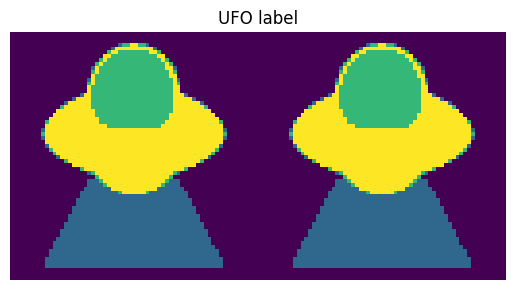

Deleted: a total of 110 aliens
New training X shape: (2505, 64, 128)
New training y shape: (2505, 64, 128)


In [ ]:
ufo_label = y_train[62]

plt.figure()
plt.imshow(ufo_label)
plt.title(f'UFO label')
plt.axis('off')
plt.show()

alien_indices = [i for i in range(len(y_train)) if np.array_equal(y_train[i], ufo_label)]

X_train = np.delete(X_train, alien_indices, axis=0)
y_train = np.delete(y_train, alien_indices, axis=0)
print(f"Deleted: a total of {len(alien_indices)} aliens")
print(f"New training X shape: {X_train.shape}")
print(f"New training y shape: {y_train.shape}")


In [ ]:
# Overrides original data set completely
if custom_data_file :
  data = np.load(custom_data_file)
  X_train = data['X_train']
  y_train = data['y_train']

In [ ]:
# Add color channel and rescale pixels between 0 and 1
X_train = X_train[..., np.newaxis] / 255.0
X_test = X_test[..., np.newaxis] / 255.0
y_train = y_train.astype(np.int32)

input_shape = X_train.shape[1:]
num_classes = len(np.unique(y_train))

print(f"Input shape: {input_shape}")
print(f"Number of classes: {num_classes}")
print(f"Shape of y_train: {np.shape(y_train)}")
print(f"Type of y_train: {y_train.dtype}")


Input shape: (64, 128, 1)
Number of classes: 5
Shape of y_train: (27505, 64, 128)
Type of y_train: int32


In [ ]:
# Split the data (not the paths!!!) into training, validation, and test sets
print("Splitting data...")
"""train_val_img, test_kaimg, train_val_lbl, test_lbl = train_test_split(
    X_train, y_train, test_size=splits_size#, random_state=seed
)"""
train_img, val_img, train_lbl, val_lbl = train_test_split(
    X_train, y_train, test_size=splits_size#, random_state=seed
)
print("Data splitted!")

print(f"\nNumber of images:")
print(f"Train img: {len(train_img)}")
print(f"Val img: {len(val_img)}")

print(f"Validation: {len(val_img)}")
#print(f"Test: {len(test_img)}")

Splitting data...
Data splitted!

Number of images:
Train img: 27205
Val img: 300
Validation: 300


In [ ]:
# Define the category mapping
category_map = {
      0: 0, #Background
      1: 1, #Soil
      2: 2, #Bedrock
      3: 3, #Sand
      4: 4, #Big Rock
  }

# Calculate the correct number of classes after mapping
NUM_CLASSES = len(set(category_map.values()))
print(f"Number of original categories: {len(category_map)}")
print(f"Number of classes after mapping: {NUM_CLASSES}")

Number of original categories: 5
Number of classes after mapping: 5


In [ ]:
def load_single_image(image, label, input_size=(64, 128)):
    """
    Load a single image-label pair with the correct shape.
    """


    """# Read and preprocess the image
    image = tf.io.read_file(image_path)
    image = tf.io.decode_png(image, channels=3)  # Ensure 3 channels
    image = tf.image.resize(image, input_size)   # Resize to fixed size
    image = tf.cast(image, tf.float32) / 255.0

    # Read and preprocess the label
    label = tf.io.read_file(label_path)
    label = tf.io.decode_png(label, channels=1)  # Ensure single channel
    label = tf.image.resize(label, input_size, method='bilinear')  # Resize to fixed size
    label = tf.cast(label, tf.int32)

    return image, label"""
    #image = tf.cast(image, tf.float32) / 255.0

    return image, label

In [ ]:
def apply_category_mapping(label):
    """    Apply category mapping to labels.

    """
    keys_tensor = tf.constant(list(category_map.keys()), dtype=tf.int32)
    vals_tensor = tf.constant(list(category_map.values()), dtype=tf.int32)
    table = tf.lookup.StaticHashTable(
        tf.lookup.KeyValueTensorInitializer(keys_tensor, vals_tensor),
        default_value=0
    )
    return table.lookup(label)

In [ ]:
def flip_horizontal(image):
    #reverse = image.numpy()
    return np.flip(image, axis=1)
    #reverse = tf.zeros(tf.shape(image))
    #for i in range(len(image)):
      #for j in range(len(image[0])):
        #print(len(image[0]))
        #reverse[i][j] = image[i][len(image[0])-j-1]
    #return reverse
    #return tf.reverse(image, axis=[1])  # Reverse along the width axis (axis 1)


def make_dataset(image_paths, label_paths, batch_size, shuffle=False, augment=False, seed=None):
    """
    Create a memory-efficient TensorFlow dataset.
    """
    # Create dataset from file paths
    dataset = tf.data.Dataset.from_tensor_slices((image_paths, label_paths))

    if shuffle:
        dataset = dataset.shuffle(buffer_size=batch_size * 2, seed=seed)

    # Load images and labels
    dataset = dataset.map(
        load_single_image,
        num_parallel_calls=tf.data.AUTOTUNE
    )

    # Apply category mapping
    dataset = dataset.map(
        lambda x, y: (x, apply_category_mapping(y)),
        num_parallel_calls=tf.data.AUTOTUNE
    )

    # Batch the data
    dataset = dataset.batch(batch_size, drop_remainder=False)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)

    return dataset

In [ ]:
# Create the datasets
print("Creating datasets...")

"""original_dataset = make_dataset(
    X_train, y_train,
    batch_size=batch_size,
    shuffle=False,
    augment=False,
    seed=seed
)"""

train_dataset = make_dataset(
    train_img, train_lbl,
    batch_size=batch_size,
    shuffle=True,
    augment=True,
    seed=seed
)

val_dataset = make_dataset(
    val_img, val_lbl,
    batch_size=batch_size,
    shuffle=False
)

"""test_dataset = make_dataset(
    test_img, test_lbl,
    batch_size=batch_size,
    shuffle=False
)"""
print("Datasets created!")

# Check the shape of the data
print(train_dataset.take(1))
for images, labels in train_dataset.take(1):
    input_shape = images.shape[1:]
    print(f"\nInput shape: {input_shape}")
    print("Images shape:", images.shape)
    print("Labels shape:", labels.shape)
    print("Labels dtype:", labels.dtype)
    break

Creating datasets...
Datasets created!
<_TakeDataset element_spec=(TensorSpec(shape=(None, 64, 128, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None, 64, 128), dtype=tf.int32, name=None))>

Input shape: (64, 128, 1)
Images shape: (64, 64, 128, 1)
Labels shape: (64, 64, 128)
Labels dtype: <dtype: 'int32'>


Visualizing examples from the training set:


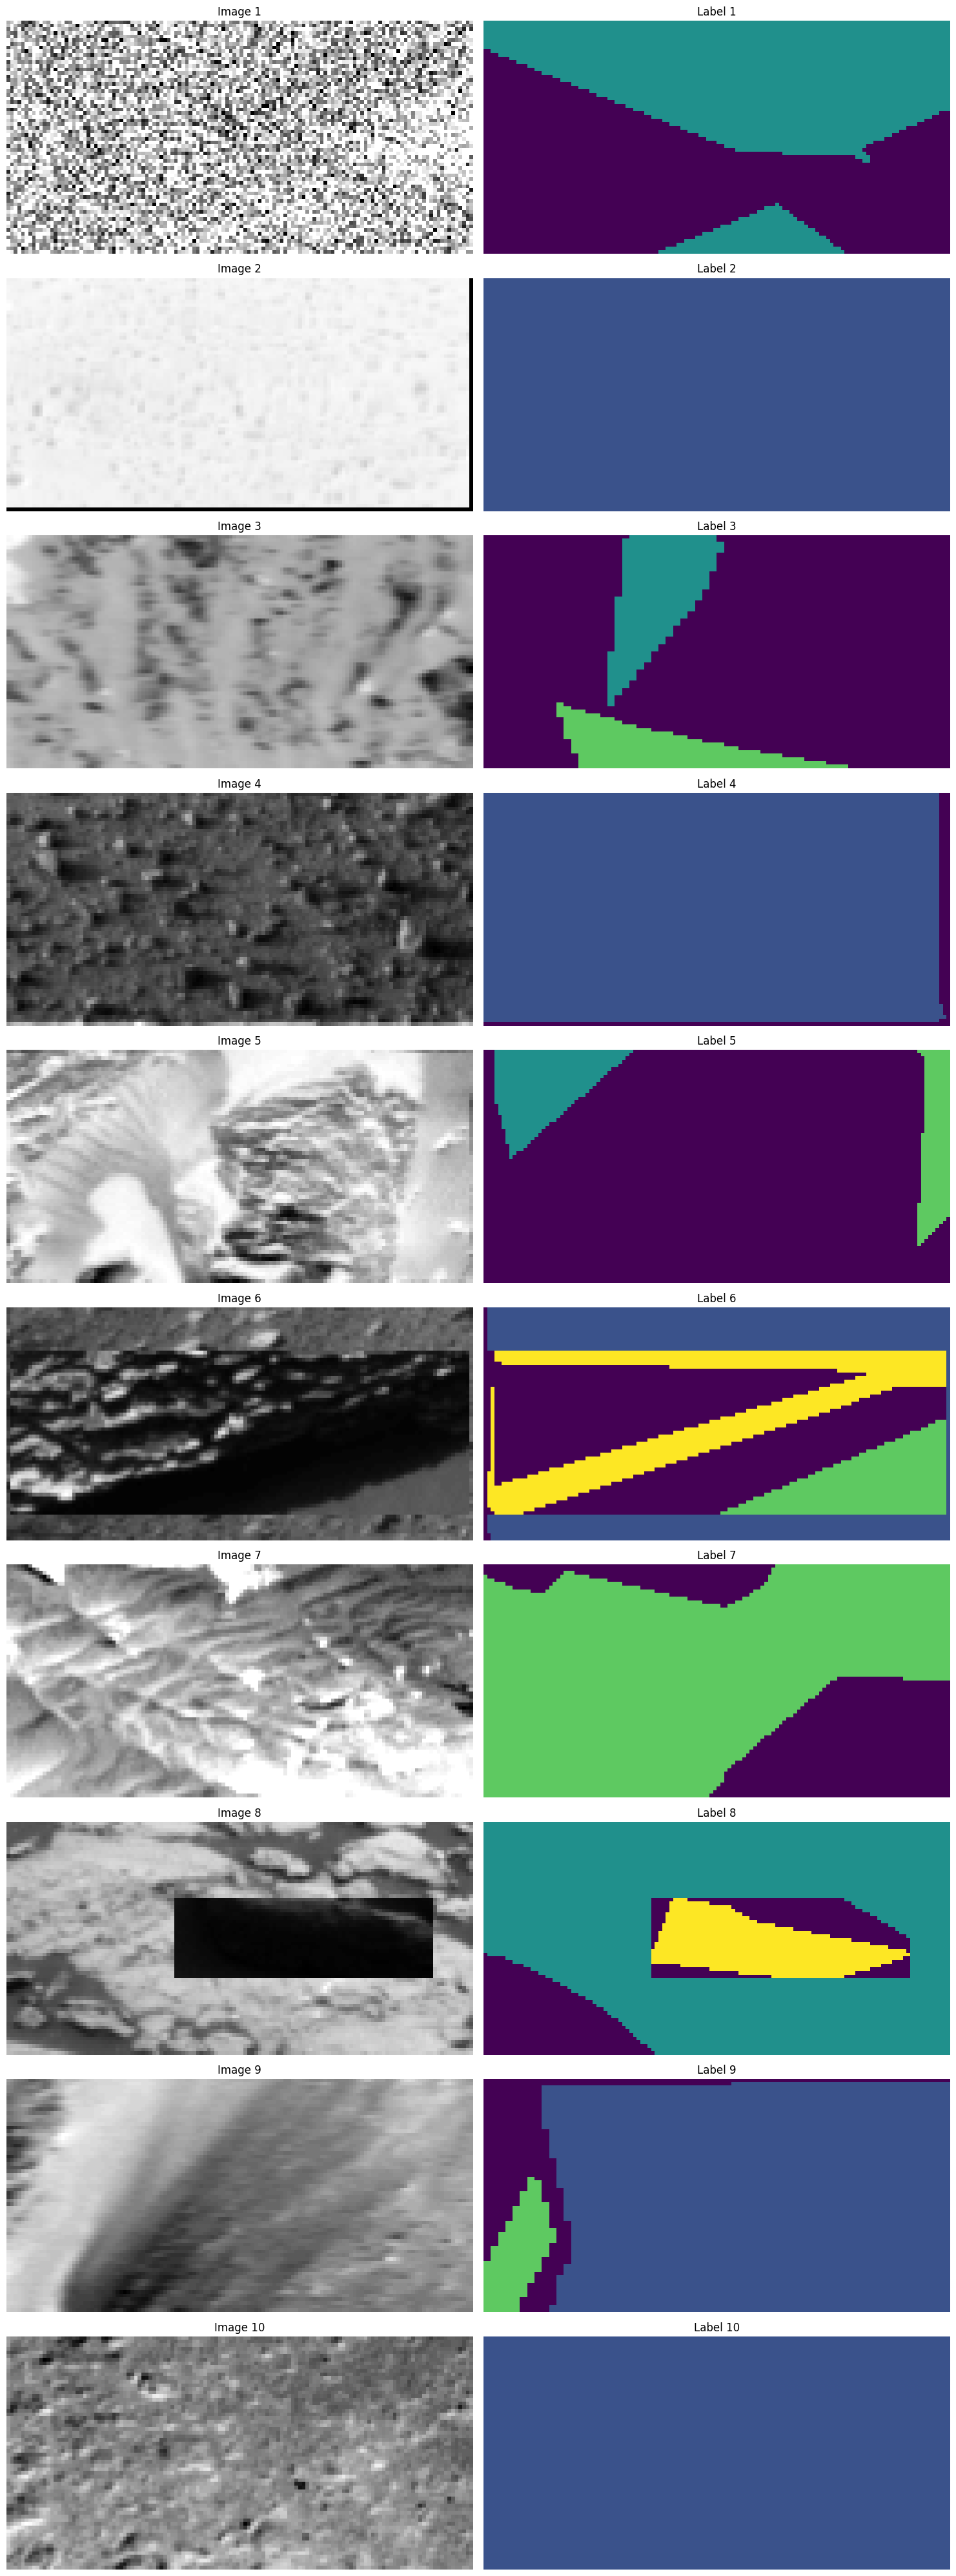

In [ ]:
def create_segmentation_colormap(num_classes):
    """
    Create a linear colormap using a predefined palette.
    Uses 'viridis' as default because it is perceptually uniform
    and works well for colorblindness.
    """
    return plt.cm.viridis(np.linspace(0, 1, num_classes))

def apply_colormap(label, colormap=None):
    """
    Apply the colormap to a label.
    """
    # Ensure label is 2D
    label = np.squeeze(label)

    if colormap is None:
        num_classes = len(np.unique(label))
        colormap = create_segmentation_colormap(num_classes)

    # Apply the colormap
    colored = colormap[label.astype(int)]

    return colored

def plot_sample_batch(dataset, num_samples=10, start_pos = 0):
    """
    Display some image and label pairs from the dataset.
    """
    plt.figure(figsize=(15, 4*num_samples))

    for images, labels in dataset.take(1):
        labels_np = labels.numpy()
        num_classes = len(np.unique(labels_np))
        colormap = create_segmentation_colormap(num_classes)

        for j in range(start_pos, min(start_pos+num_samples, len(images))):
            # Plot original image
            plt.subplot(num_samples, 2, j*2 + 1)
            plt.imshow(images[j],cmap='gray')
            plt.title(f'Image {j+1}')
            plt.axis('off')

            # Plot colored label
            plt.subplot(num_samples, 2, j*2 + 2)
            #print(f"labels_np[{j}].shape: {labels_np[j].shape}")
            colored_label = apply_colormap(labels_np[j], colormap)
            plt.imshow(colored_label)
            plt.title(f'Label {j+1}')
            plt.axis('off')

    plt.tight_layout()
    plt.show()
    plt.close()

# Visualize examples from the training set
print(f"Visualizing examples from the training set:")
plot_sample_batch(train_dataset, 10)
#we have ufos at

##Custom loss function to ignore 0 class

In [ ]:
from tensorflow.keras.utils import register_keras_serializable

@register_keras_serializable()
def loss_0_ignored(y_true, y_pred):
  indices_to_keep = tf.not_equal(y_true, 0)

  y_true_masked = tf.boolean_mask(y_true, indices_to_keep)
  y_pred_masked = tf.boolean_mask(y_pred, indices_to_keep)
  loss_fn = tf.losses.SparseCategoricalCrossentropy()
  return loss_fn(y_true_masked, y_pred_masked)



##Our model

In [ ]:
def build_unet(input_shape=input_shape, num_classes=5):
    """
    Builds a U-Net model for semantic segmentation.
    Args:
        input_shape (tuple): Shape of the input image (H, W, C).
        num_classes (int): Number of output classes (including background).

    Returns:
        model (tf.keras.Model): Compiled U-Net model.
    """
    #initial=8, squeezed_layer=True and no skips led to 0.6598 iou after 100 epochs
    #same but with skips reached 0.6766
    initial = 4
    squeezed_layer = True
    skips = True
    dropout = False
    dropout_rate = 0.4

    inputs = layers.Input(shape=input_shape)


    # Encoder
    c0 = layers.Conv2D(initial*2, (3, 3), activation='relu', padding='same')(inputs)
    if squeezed_layer:
      c0 = layers.Conv2D(initial*2, (3, 3), activation='relu', padding='same')(c0)
    if dropout:
      c0 = layers.Dropout(dropout_rate)(c0)
    p0 = layers.MaxPooling2D((2, 2))(c0)

    c1 = layers.Conv2D(initial*8, (3, 3), activation='relu', padding='same')(p0)
    if squeezed_layer:
      c1 = layers.Conv2D(initial*8, (3, 3), activation='relu', padding='same')(c1)
    if dropout:
      c1 = layers.Dropout(dropout_rate)(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(initial*16, (3, 3), activation='relu', padding='same')(p1)
    if squeezed_layer:
      c2 = layers.Conv2D(initial*16, (3, 3), activation='relu', padding='same')(c2)
    if dropout:
      c2 = layers.Dropout(dropout_rate)(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    #c3 = layers.Conv2D(initial*32, (3, 3), activation='relu', padding='same')(p2)
    #if squeezed_layer:
      #c3 = layers.Conv2D(initial*32, (3, 3), activation='relu', padding='same')(c3)
    #p3 = layers.MaxPooling2D((2, 2))(c3)

    # Bottleneck
    b1 = layers.Conv2D(initial*32, (3, 3), activation='relu', padding='same')(p2)
    if squeezed_layer:
      b1 = layers.Conv2D(initial*32, (3, 3), activation='relu', padding='same')(b1)

    if dropout:
      b1 = layers.Dropout(dropout_rate)(b1)

    # Decoder
    #u1 = layers.UpSampling2D((2, 2))(b1)
    #if skips:
      #u1 = layers.concatenate([u1, c3])
    #c4 = layers.Conv2D(initial*32, (3, 3), activation='relu', padding='same')(u1)
    #if squeezed_layer:
      #c4 = layers.Conv2D(initial*32, (3, 3), activation='relu', padding='same')(c4)


    u2 = layers.UpSampling2D((2, 2))(b1)
    if skips:
      u2 = layers.concatenate([u2, c2])
    c5 = layers.Conv2D(initial*16, (3, 3), activation='relu', padding='same')(u2)
    if squeezed_layer:
      c5 = layers.Conv2D(initial*16, (3, 3), activation='relu', padding='same')(c5)
    if dropout:
      c5 = layers.Dropout(dropout_rate)(c5)

    u3 = layers.UpSampling2D((2, 2))(c5)
    if skips:
      u3 = layers.concatenate([u3, c1])
    c6 = layers.Conv2D(initial*8, (3, 3), activation='relu', padding='same')(u3)
    if squeezed_layer:
      c6 = layers.Conv2D(initial*8, (3, 3), activation='relu', padding='same')(c6)
    if dropout:
      c6 = layers.Dropout(dropout_rate)(c6)

    u4 = layers.UpSampling2D((2, 2))(c6)
    if skips:
      u4 = layers.concatenate([u4, c0])
    c7 = layers.Conv2D(initial*2, (3, 3), activation='relu', padding='same')(u4)
    if squeezed_layer:
      c7 = layers.Conv2D(initial*2, (3, 3), activation='relu', padding='same')(c7)
    if dropout:
      c7 = layers.Dropout(dropout_rate)(c7)

    outputs = layers.Conv2D(num_classes, (1, 1), activation='softmax')(c7)

    model = models.Model(inputs, outputs)

    mean_iou = tfk.metrics.MeanIoU(num_classes=num_classes, ignore_class=0, sparse_y_pred=False)

    model.compile(optimizer="adam", loss=loss_0_ignored, metrics=[mean_iou])

    return model

##Build and train model

In [ ]:
model = build_unet()
# Plot the model architecture
tfk.utils.plot_model(model, expand_nested=False, show_trainable=False, show_shapes=False, dpi=70)
# Display a summary of the model architecture
model.summary(expand_nested=True, show_trainable=True)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)           ┃ Output Shape         ┃      Param # ┃ Connected to        ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ input_layer            │ (None, 64, 128, 1)   │            0 │ -                   │    -    │
│ (InputLayer)           │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ conv2d (Conv2D)        │ (None, 64, 128, 8)   │           80 │ input_layer[0][0]   │    Y    │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ conv2d_1 (Conv2D)      │ (None, 64, 128, 8)   │          584 │ conv2d[0][0]        │    Y    │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ dropout (Dropout)      │ (None, 64, 128, 8)   │            0 │ conv2d_1[0][0]      │    -    │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ max_pooling2d          │ (None, 32, 64, 8)    │            0 │ dropout[0][0]       │    -    │
│ (MaxPooling2D)         │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ conv2d_2 (Conv2D)      │ (None, 32, 64, 32)   │        2,336 │ max_pooling2d[0][0] │    Y    │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ conv2d_3 (Conv2D)      │ (None, 32, 64, 32)   │        9,248 │ conv2d_2[0][0]      │    Y    │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ dropout_1 (Dropout)    │ (None, 32, 64, 32)   │            0 │ conv2d_3[0][0]      │    -    │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ max_pooling2d_1        │ (None, 16, 32, 32)   │            0 │ dropout_1[0][0]     │    -    │
│ (MaxPooling2D)         │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ conv2d_4 (Conv2D)      │ (None, 16, 32, 64)   │       18,496 │ max_pooling2d_1[0]… │    Y    │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ conv2d_5 (Conv2D)      │ (None, 16, 32, 64)   │       36,928 │ conv2d_4[0][0]      │    Y    │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ dropout_2 (Dropout)    │ (None, 16, 32, 64)   │            0 │ conv2d_5[0][0]      │    -    │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ max_pooling2d_2        │ (None, 8, 16, 64)    │            0 │ dropout_2[0][0]     │    -    │
│ (MaxPooling2D)         │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ conv2d_6 (Conv2D)      │ (None, 8, 16, 128)   │       73,856 │ max_pooling2d_2[0]… │    Y    │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ conv2d_7 (Conv2D)      │ (None, 8, 16, 128)   │      147,584 │ conv2d_6[0][0]      │    Y    │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ dropout_3 (Dropout)    │ (None, 8, 16, 128)   │            0 │ conv2d_7[0][0]      │    -    │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ up_sampling2d          │ (None, 16, 32, 128)  │            0 │ dropout_3[0][0]     │    -    │
│ (UpSampling2D)         │                      │              │                     │         │
├──────────────────────

 Total params: 477,141 (1.82 MB)

 Trainable params: 477,141 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset)

Epoch 1/10
426/426 ━━━━━━━━━━━━━━━━━━━━ 22s 52ms/step - loss: 0.5812 - mean_io_u: 0.5668 - val_loss: 1.5677 - val_mean_io_u: 0.3331
Epoch 2/10
426/426 ━━━━━━━━━━━━━━━━━━━━ 22s 53ms/step - loss: 0.5549 - mean_io_u: 0.5906 - val_loss: 1.9462 - val_mean_io_u: 0.2826
Epoch 3/10
426/426 ━━━━━━━━━━━━━━━━━━━━ 22s 52ms/step - loss: 0.5477 - mean_io_u: 0.5952 - val_loss: 1.3055 - val_mean_io_u: 0.3501
Epoch 4/10
426/426 ━━━━━━━━━━━━━━━━━━━━ 22s 51ms/step - loss: 0.5160 - mean_io_u: 0.6128 - val_loss: 1.6566 - val_mean_io_u: 0.3314
Epoch 5/10
426/426 ━━━━━━━━━━━━━━━━━━━━ 22s 52ms/step - loss: 0.5037 - mean_io_u: 0.6214 - val_loss: 1.9215 - val_mean_io_u: 0.2735
Epoch 6/10
426/426 ━━━━━━━━━━━━━━━━━━━━ 22s 52ms/step - loss: 0.4993 - mean_io_u: 0.6280 - val_loss: 1.5350 - val_mean_io_u: 0.3383
Epoch 7/10
426/426 ━━━━━━━━━━━━━━━━━━━━ 22s 52ms/step - loss: 0.4761 - mean_io_u: 0.6366 - val_loss: 1.4998 - val_mean_io_u: 0.3398
Epoch 8/10
426/426 ━━━━━━━━━━━━━━━━━━━━ 22s 52ms/step - loss: 0.4643 - mean_

##K-Fold validation

In [ ]:
# Number of splits for K-Fold
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Store metrics for each fold
fold_metrics = []

# Start K-Fold Cross-Validation
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    print(f"Starting Fold {fold + 1}/{k_folds}...")

    # Split data
    X_train_k, X_val = X_train[train_idx], X_train[val_idx] # X_train and X_val are already in the correct shape
    y_train_k, y_val = y_train[train_idx], y_train[val_idx]

    # Build and compile the U-Net model
    model = build_unet()

    # Train the model
    history = model.fit(X_train_k, y_train_k, epochs=10, validation_data=(X_val, y_val))

    # Evaluate the model
    val_loss, val_mean_iou = model.evaluate(X_val, y_val, verbose=1)
    print(f"Fold {fold + 1} - Loss: {val_loss:.4f}, Mean IoU: {val_mean_iou:.4f}")

    # Store fold metrics
    fold_metrics.append({"loss": val_loss, "mean_iou": val_mean_iou})

    # Save the model for each fold
    model.save(f"unet_model_fold_{fold + 1}.keras")

Starting Fold 1/5...
Epoch 1/2
688/688 ━━━━━━━━━━━━━━━━━━━━ 40s 45ms/step - loss: 1.2727 - mean_io_u_12: 0.1412 - val_loss: 1.1859 - val_mean_io_u_12: 0.1588
Epoch 2/2
688/688 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - loss: 1.1455 - mean_io_u_12: 0.2084 - val_loss: 1.0161 - val_mean_io_u_12: 0.3144
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.9713 - mean_io_u_12: 0.3209
Fold 1 - Loss: 1.0161, Mean IoU: 0.3144
Starting Fold 2/5...
Epoch 1/2
688/688 ━━━━━━━━━━━━━━━━━━━━ 40s 45ms/step - loss: 1.2779 - mean_io_u_13: 0.1056 - val_loss: 1.1758 - val_mean_io_u_13: 0.1568
Epoch 2/2
688/688 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - loss: 1.1514 - mean_io_u_13: 0.1663 - val_loss: 1.0234 - val_mean_io_u_13: 0.2903
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.9580 - mean_io_u_13: 0.3090
Fold 2 - Loss: 1.0234, Mean IoU: 0.2903
Starting Fold 3/5...
Epoch 1/2
688/688 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - loss: 1.2735 - mean_io_u_14: 0.1224 - val_loss: 0.9793 - val_mean_io_u_14: 0.2853
Epoch 2/2
688/

## Display predictions

Visualizing examples from the test set:
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 980ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


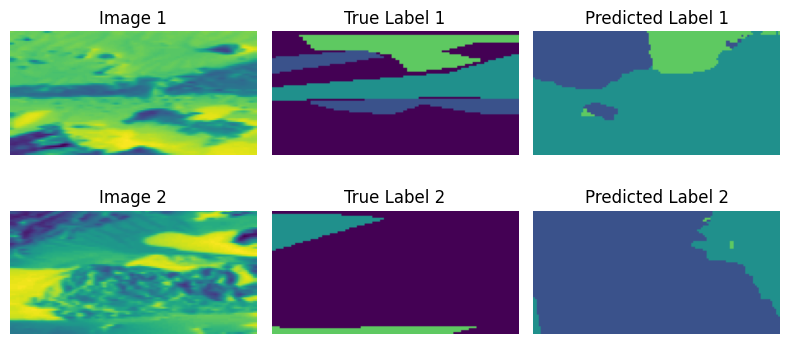

In [ ]:
def plot_sample_batch(dataset, num_samples=5):
    """
    Display some image and label pairs from the dataset.
    """
    plt.figure(figsize=(8, 2*num_samples))
    #plt.figure()
    for images, labels in dataset.take(1):
        labels_np = labels.numpy()
        num_classes = len(np.unique(labels_np))
        colormap = create_segmentation_colormap(num_classes)

        for j in range(min(num_samples, len(images))):
            # Plot original image
            plt.subplot(num_samples, 3, j*3 + 1)
            plt.imshow(images[j])
            plt.title(f'Image {j+1}')
            plt.axis('off')

            # Plot colored label
            plt.subplot(num_samples, 3, j*3 + 2)
            colored_label = apply_colormap(labels_np[j], colormap)
            plt.imshow(colored_label)
            plt.title(f'True Label {j+1}')
            plt.axis('off')

            # Plot colored label
            plt.subplot(num_samples, 3, j*3 + 3)
            #image_extra_axis = np.expand_dims(images[j], axis=2)
            image_extra_axis = images[j][None,...]
            #print(f"image_extra_axis = {image_extra_axis}")
            #print(f"images[{j}] = {images[j]}")

            prediction = model.predict(image_extra_axis) #adding an extra axis to make sure shape is correct
            prediction = np.argmax(prediction, axis=-1)

            colored_label = apply_colormap(prediction, colormap)
            plt.imshow(colored_label)
            plt.title(f'Predicted Label {j+1}')
            plt.axis('off')

    plt.tight_layout()
    plt.show()
    plt.close()


# Visualize examples from the training set
print("Visualizing examples from the test set:")
plot_sample_batch(val_dataset,2)

In [ ]:
timestep_str = datetime.now().strftime("%y%m%d_%H%M%S")
model_filename = f"model_{timestep_str}.keras"
model.save(model_filename)
del model

print(f"Model saved to {model_filename}")

Model saved to model_241213_143822.keras


## 📊 Prepare Your Submission

In our Kaggle competition, submissions are made as `csv` files. To create a proper `csv` file, you need to flatten your predictions and include an `id` column as the first column of your dataframe. To maintain consistency between your results and our solution, please avoid shuffling the test set. The code below demonstrates how to prepare the `csv` file from your model predictions.




In [ ]:
# If model_filename is not defined, load the most recent model from Google Drive
if "model_filename" not in globals() or model_filename is None:
    files = [f for f in os.listdir('.') if os.path.isfile(f) and f.startswith('model_') and f.endswith('.keras')]
    files.sort(key=lambda x: os.path.getmtime(x), reverse=True)
    if files:
        model_filename = files[0]
    else:
        raise FileNotFoundError("No model files found in the current directory.")

In [ ]:
model = tfk.models.load_model(model_filename)
print(f"Model loaded from {model_filename}")

Model loaded from model_241213_143822.keras


In [ ]:
preds = model.predict(X_test)
preds = np.argmax(preds, axis=-1)
print(f"Predictions shape: {preds.shape}")

314/314 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step
Predictions shape: (10022, 64, 128)


In [ ]:
def y_to_df(y) -> pd.DataFrame:
    """Converts segmentation predictions into a DataFrame format for Kaggle."""
    n_samples = len(y)
    y_flat = y.reshape(n_samples, -1)
    df = pd.DataFrame(y_flat)
    df["id"] = np.arange(n_samples)
    cols = ["id"] + [col for col in df.columns if col != "id"]
    return df[cols]

In [ ]:
# Create and download the csv submission file
timestep_str = model_filename.replace("model_", "").replace(".keras", "")
submission_filename = f"submission_{timestep_str}.csv"
submission_df = y_to_df(preds)
submission_df.to_csv(submission_filename, index=False)

from google.colab import files
files.download(submission_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#  
<img src="https://airlab.deib.polimi.it/wp-content/uploads/2019/07/airlab-logo-new_cropped.png" width="350">

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/95/Instagram_logo_2022.svg/800px-Instagram_logo_2022.svg.png" width="15"> **Instagram:** https://www.instagram.com/airlab_polimi/

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/LinkedIn_icon.svg/2048px-LinkedIn_icon.svg.png" width="15"> **LinkedIn:** https://www.linkedin.com/company/airlab-polimi/
___
Credits: Alberto Archetti 📧 alberto.archetti@polito.it





```
   Copyright 2024 Alberto Archetti

   Licensed under the Apache License, Version 2.0 (the "License");
   you may not use this file except in compliance with the License.
   You may obtain a copy of the License at

       http://www.apache.org/licenses/LICENSE-2.0

   Unless required by applicable law or agreed to in writing, software
   distributed under the License is distributed on an "AS IS" BASIS,
   WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
   See the License for the specific language governing permissions and
   limitations under the License.
```